# **Task 1: Decision Tree Classifier**

In this task, we will build on the breast cancer classification problem introduced in the previous assignment (where Logistic Regression was used). The goal is to develop a **Decision Tree Classifier** to distinguish between malignant (cancerous) and benign (non-cancerous) tumors using the **Wisconsin Breast Cancer dataset**.

---

## **1. Problem Definition**

As stated previously, the motivation stems from a desire to accurately identify malignant breast tumors based on measurable characteristics of cell nuclei in breast mass images. By training a **Decision Tree** on this data, we aim to:

- Provide an interpretable model that can give insight into which tumor features most strongly influence the malignancy prediction.
- Compare how decision trees handle this classification task relative to the logistic regression approach used earlier.

**Dataset Source**: UCI Machine Learning Repository  
**Target Variable**: `Diagnosis`  
- `1` for malignant (M)  
- `0` for benign (B)

---

## **2. Justification for Using a Decision Tree**

1. **Interpretability**  
   Decision Trees provide a human-readable flowchart. Medical professionals often appreciate the transparency, as it can help justify and understand a model’s recommendations.

2. **Nonlinear Decision Boundaries**  
   Unlike linear models, Decision Trees can easily capture nonlinear patterns, which might be important for breast cancer features.

3. **Less Sensitive to Feature Scaling**  
   While we still may apply standardization, trees inherently rely on feature comparisons, making them less sensitive to scale differences across features.

---

## **3. Sensitivity Analysis: Definition and Relevance**

**Sensitivity Analysis** in machine learning attempts to measure how changes in individual input features affect the model’s predictions. In the context of Decision Trees, we often:
- Look at **feature importance** scores.
- Use **Partial Dependence Plots (PDPs)** to visualize how varying one or two features while keeping others constant affects the predicted probability of malignancy.

**Why is this relevant?**  
- It helps domain experts (e.g., medical practitioners) see which features have the greatest impact on classifying a tumor as malignant or benign.
- It can confirm if the model is relying on medically relevant factors.

**References**:  
- Molnar, C. (2022). *Interpretable Machine Learning*. Lulu.com.  
- Scikit-Learn Documentation: [Partial Dependence Plots](https://scikit-learn.org/stable/modules/partial_dependence.html)

---

## **4. Implementation and Analysis**

Below is a step-by-step Jupyter Notebook-style implementation. We will:

1. Load and preprocess the Wisconsin Breast Cancer dataset.
2. Train a Decision Tree with different hyperparameters (at least three variations).
3. Visualize each of these Decision Trees.
4. Perform sensitivity analysis using partial dependence on at least two features.



Model 1 | Params = {'max_depth': 2, 'min_samples_split': 2} | Test Accuracy = 0.833
Model 2 | Params = {'max_depth': 4, 'min_samples_split': 2} | Test Accuracy = 0.833
Model 3 | Params = {'max_depth': None, 'min_samples_split': 10} | Test Accuracy = 0.816

Decision Tree Visualizations (Graphviz)
--> Visualization for Model 1 with params {'max_depth': 2, 'min_samples_split': 2}


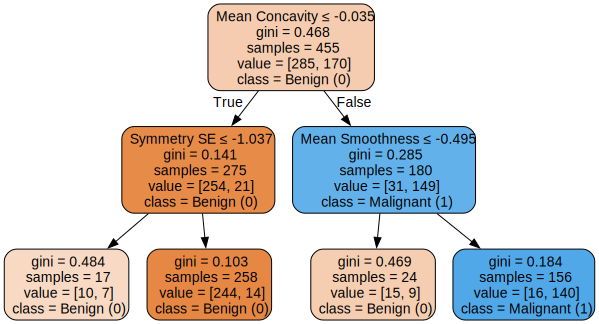

--> Visualization for Model 2 with params {'max_depth': 4, 'min_samples_split': 2}


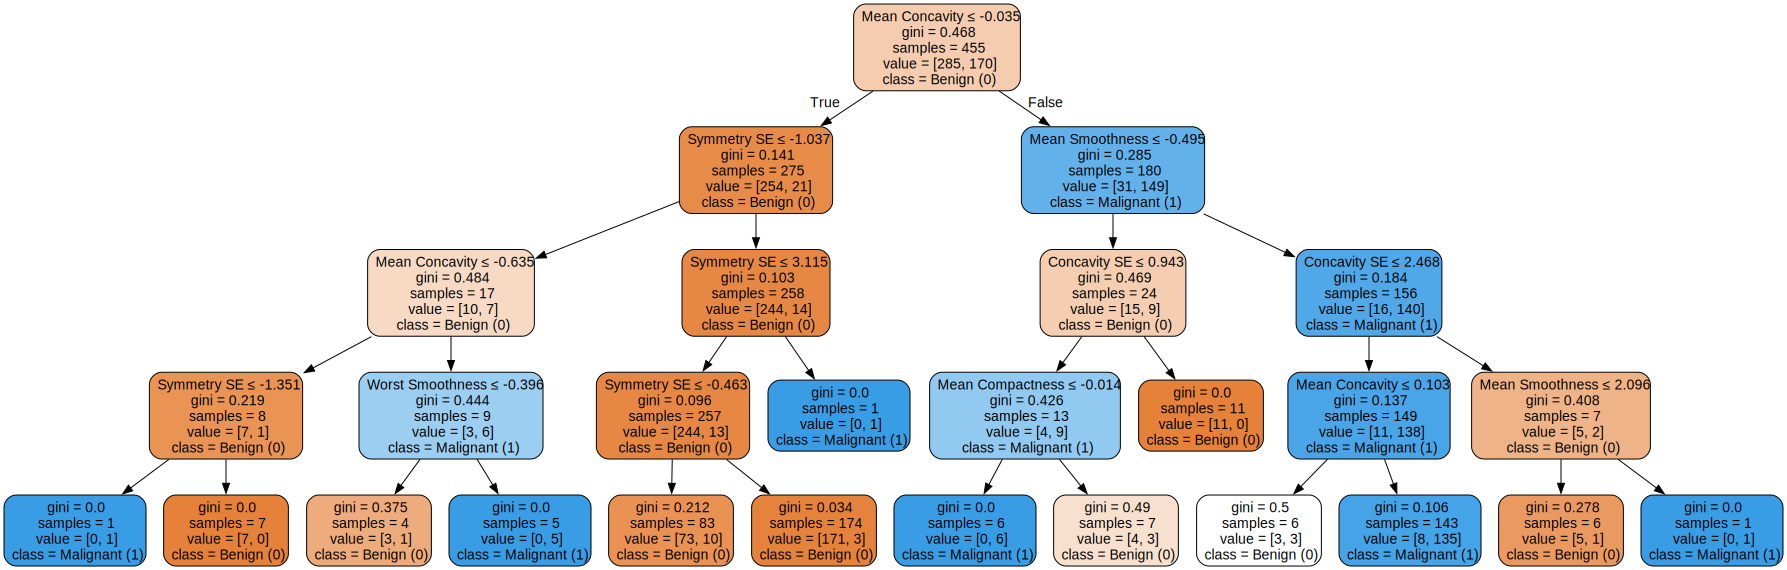

--> Visualization for Model 3 with params {'max_depth': None, 'min_samples_split': 10}


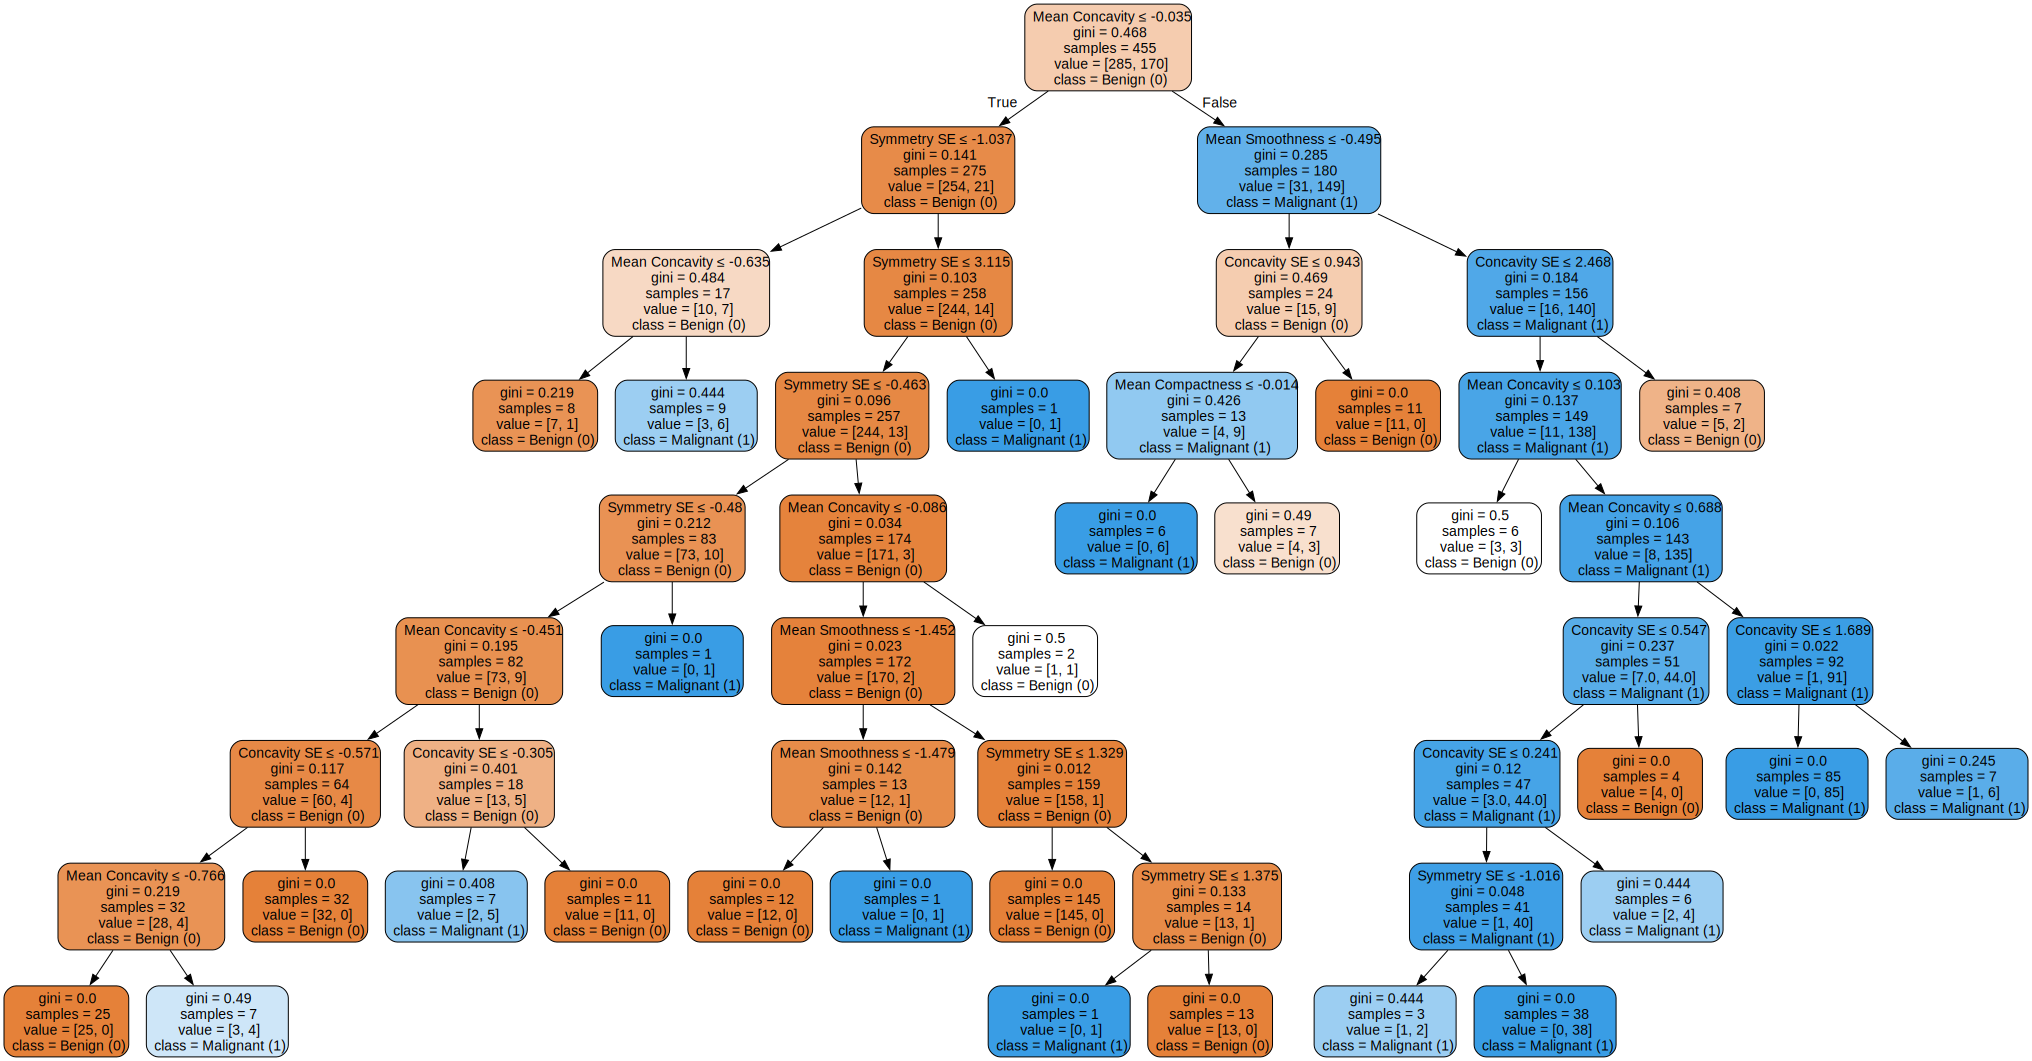

Model 1 | Params = {'max_depth': 2, 'min_samples_split': 2}
Observed Max Depth: 2
Number of Leaves  : 4
--------------------------------------------------
Model 2 | Params = {'max_depth': 4, 'min_samples_split': 2}
Observed Max Depth: 4
Number of Leaves  : 14
--------------------------------------------------
Model 3 | Params = {'max_depth': None, 'min_samples_split': 10}
Observed Max Depth: 8
Number of Leaves  : 26
--------------------------------------------------


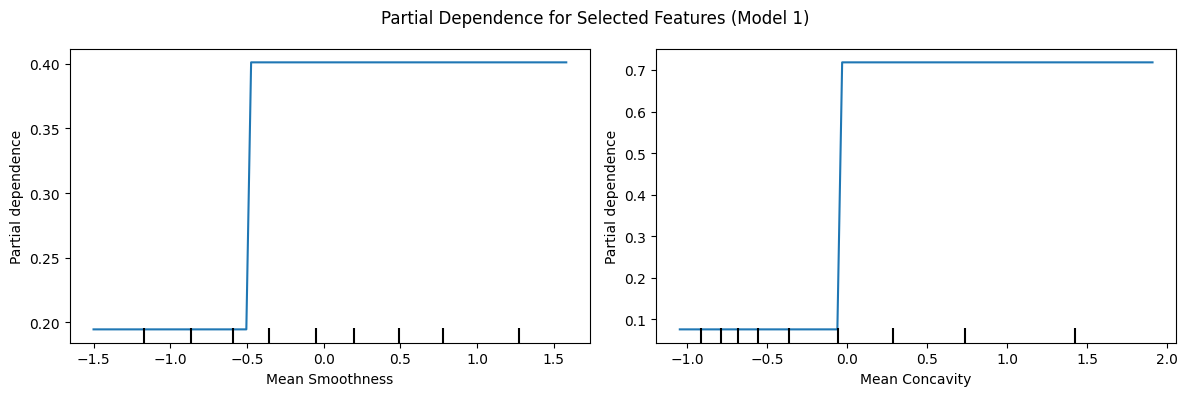

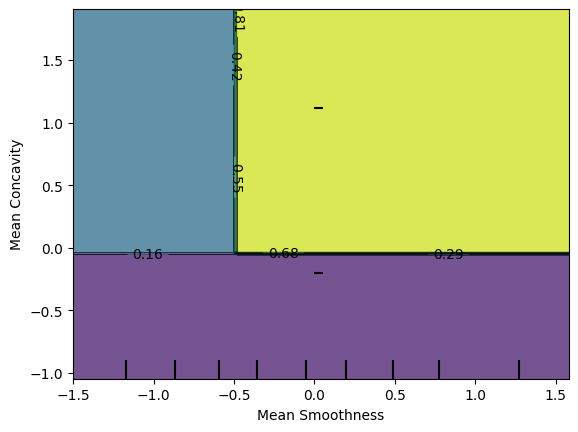

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# For visualization of the tree
import graphviz

# ------------------------------------------------------------------------------
# 1. Load the Wisconsin Breast Cancer Dataset
# ------------------------------------------------------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    'ID', 'Diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness',
    'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
    'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 
    'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
    'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 
    'Worst Fractal Dimension'
]
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)

# Convert Diagnosis: M -> 1, B -> 0
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# ------------------------------------------------------------------------------
# 2. Select Features & Preprocess (stuck with the most predictive features captured in last hw)
# ------------------------------------------------------------------------------
reduced_features = [
    'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
    'Concavity SE', 'Symmetry SE', 'Worst Smoothness'
]
X = data[reduced_features].values
y = data['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Standardize features (though Decision Trees are not as sensitive to scale, it's consistent with prior practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------------------------------
# 3. Train Decision Tree Classifiers With Different Hyperparameters
# ------------------------------------------------------------------------------
param_settings = [
    {"max_depth": 2, "min_samples_split": 2},
    {"max_depth": 4, "min_samples_split": 2},
    {"max_depth": None, "min_samples_split": 10}
]

dt_models = []
for i, params in enumerate(param_settings):
    dt = DecisionTreeClassifier(
        random_state=42,
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"]
    )
    dt.fit(X_train, y_train)
    dt_models.append(dt)
    
    # Evaluate on test set
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model {i+1} | Params = {params} | Test Accuracy = {acc:.3f}")

# ------------------------------------------------------------------------------
# 4. Visualize Each Decision Tree
# ------------------------------------------------------------------------------
print("\nDecision Tree Visualizations (Graphviz)")
feature_names = reduced_features
class_names = ["Benign (0)", "Malignant (1)"]

for i, dt in enumerate(dt_models):
    dot_data = export_graphviz(
        dt,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    print(f"--> Visualization for Model {i+1} with params {param_settings[i]}")
    display(graph)

# ------------------------------------------------------------------------------
# 5. Comment on Tree Depth & Complexity
# ------------------------------------------------------------------------------
for i, dt in enumerate(dt_models):
    print(f"Model {i+1} | Params = {param_settings[i]}")
    print("Observed Max Depth:", dt.get_depth())
    print("Number of Leaves  :", dt.get_n_leaves())
    print("-" * 50)

# ------------------------------------------------------------------------------
# 6. Sensitivity Analysis via Partial Dependence Plots (PDP)
# ------------------------------------------------------------------------------
model_for_pdp = dt_models[0]  # picking the first model
features_to_plot = [0, 2]     # indices of features in reduced_features

# Single feature PDP for each
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    model_for_pdp, X_train, features=[features_to_plot[0]],
    feature_names=feature_names, ax=ax[0]
)
PartialDependenceDisplay.from_estimator(
    model_for_pdp, X_train, features=[features_to_plot[1]],
    feature_names=feature_names, ax=ax[1]
)
plt.suptitle("Partial Dependence for Selected Features (Model 1)")
plt.tight_layout()
plt.show()

# 2D partial dependence 
PartialDependenceDisplay.from_estimator(
    model_for_pdp, X_train, features=[features_to_plot],
    feature_names=feature_names, kind='average'
)
plt.show()



## **Sensitivity Analysis: Partial Dependence Plot Observations**

After generating partial dependence plots for two selected features—**Mean Smoothness** (index 0) and **Mean Concavity** (index 2) in our feature set—we observe the following:

1. **Mean Smoothness**  
   - In the partial dependence plot, the predicted probability of malignancy stays around **0.20** for negative values of Mean Smoothness.  
   - At approximately **-0.5** (standardized scale), the predicted probability **jumps** from **0.20** to about **0.40**, and then remains fairly constant again.  
   - This abrupt shift indicates the Decision Tree has identified **-0.5** (or close to this value) as a significant split threshold for this feature.  
   - Interpreted clinically, it implies that once Mean Smoothness passes a certain cutoff (in the standardized domain), the likelihood of malignancy increases markedly according to this model.

2. **Mean Concavity**  
   - The partial dependence plot for Mean Concavity shows an even **larger jump** in predicted malignancy probability.  
   - Below **0** (also in the standardized scale), the model’s estimated probability is about **0.10**.  
   - Once Mean Concavity reaches **0**, the probability **spikes** to around **0.70**.  
   - This suggests that non-negative (≥ 0) Mean Concavity values exert a strong influence on predicting malignancy in our decision tree.  
   - The nearly flat horizontal line before 0, followed by a sudden jump, reflects how the Decision Tree’s split on this feature dramatically shifts the predicted class probability.

### **Why These Stepwise Jumps?**
Decision Trees partition the feature space into regions based on threshold splits. Partial Dependence Plots for trees often look like **step functions**, because once the feature crosses a specific threshold learned during training, the predicted probability shifts to a new level. In contrast, models that learn smooth decision boundaries might show more gradual changes in PDPs.

**Key Takeaway**:  
- The **threshold-based nature** of Decision Trees explains why the plots remain constant over certain ranges and then abruptly change at a split boundary.  
- Features that cause large jumps in probability (like **Mean Concavity** in this example) are typically **highly influential** in the tree’s decision rules.  

**References**:  
- Molnar, C. (2022). *Interpretable Machine Learning*. Lulu.com.  
- Scikit-Learn Documentation: [Partial Dependence Plots](https://scikit-learn.org/stable/modules/partial_dependence.html)


## **Decision Tree Complexity Analysis**

For our three Decision Tree models, we varied the hyperparameters `max_depth` and `min_samples_split` to see their impact on the tree structure and performance. Below is a brief discussion of how tree **depth** and **complexity** change under each configuration.

### **Model 1** 
- **Parameters**: `max_depth=2`, `min_samples_split=2`
- **Max Depth Observed**: 2  
- **Number of Leaves**: 4  
- **Test Accuracy**: 0.833  

**Interpretation**:  
- The tree is relatively shallow, only two levels deep. This typically reduces variance since it cannot overfit too heavily on the training data.  
- A potential downside is higher bias, meaning the model might not capture all the nuanced interactions in the data.  
- Despite being shallow, the accuracy (0.833) is quite good, suggesting that a low-complexity model may suffice for this dataset.

---

### **Model 2**
- **Parameters**: `max_depth=4`, `min_samples_split=2`
- **Max Depth Observed**: 4  
- **Number of Leaves**: 14  
- **Test Accuracy**: 0.833  

**Interpretation**:  
- This tree is allowed to grow deeper (up to four levels), resulting in a larger number of leaves than Model 1.  
- The added complexity can capture more detailed splits in the data, potentially reducing bias.  
- Although it’s more complex, the test accuracy remains the same (0.833) as the shallower tree—suggesting that beyond a certain point, extra splits may not always yield higher accuracy on this dataset.

---

### **Model 3**
- **Parameters**: `max_depth=None`, `min_samples_split=10`
- **Max Depth Observed**: 8  
- **Number of Leaves**: 26  
- **Test Accuracy**: 0.816  

**Interpretation**:  
- With no explicit limit on depth, the tree can keep growing until limited by other factors such as `min_samples_split=10`.  
- This results in a deeper tree (depth=8) with substantially more leaves (26) compared to Models 1 and 2, indicating higher complexity and a potentially larger risk of overfitting.  
- The slightly **lower** accuracy (0.816) compared to the other two models might reflect overfitting, or simply that the additional splits do not generalize as well to the test set.

---

## **Overall Takeaways**

1. **Increasing Depth Increases Complexity**  
   - As `max_depth` grows, so does the number of decision nodes/leaves, potentially capturing more interactions but increasing the risk of overfitting.

2. **Balancing Bias and Variance**  
   - A shallow tree (Model 1) can sometimes be sufficient if the data patterns are not exceedingly complex. It might have higher bias but lower variance.  
   - A deeper tree (Model 2) often captures more nuances at the cost of greater variance—however, in this case, it still achieved the same accuracy as the shallow tree.  
   - An unconstrained tree (Model 3) can become quite deep and complex, which may lead to overfitting if not carefully tuned.

3. **No Universal Best Depth**  
   - The “best” depth depends on the dataset’s complexity and noise. In some cases, a moderately deep tree balances both bias and variance.  
   - Regularization strategies (like limiting `max_depth` or increasing `min_samples_split`) can keep the tree from growing unnecessarily large.

In conclusion, **models with higher depth indeed become more complex**, but they do not necessarily guarantee better test performance. Effective tuning of `max_depth` and other hyperparameters is essential to strike a suitable balance for a given dataset.


# **Task 2: Bagging and Boosting Ensemble Methods**

In this task, we extend our breast cancer classification problem to **ensemble** methods. We will focus on **Bagging** and **Boosting** to examine their effectiveness on the **Wisconsin Breast Cancer dataset**.

---

## **1. Introduction**

### **1.1 Bagging (Bootstrap Aggregating)**
- **Definition**: A method that trains multiple base models (often Decision Trees) on different **bootstrap** samples of the data. The final prediction is typically the **majority vote** (for classification) or the **average** (for regression) of all base models.  
- **Benefit**: Bagging helps **reduce variance**, leading to improved stability compared to a single tree.  
- **Reference**:  
  - Breiman, L. (1996). Bagging predictors. *Machine Learning*, 24(2), 123–140.

### **1.2 Boosting**
- **Definition**: An iterative technique where each new model (weak learner) focuses on the **errors** of the previous ensemble. Over time, errors get corrected, leading to a strong model.  
- **Popular Algorithms**: AdaBoost, Gradient Boosting, XGBoost, etc.  
- **Benefit**: Boosting can lower both **bias** and **variance**, but may require careful tuning (e.g., learning rate) to avoid overfitting.  
- **Reference**:  
  - Freund, Y., & Schapire, R. E. (1997). A decision-theoretic generalization of on-line learning and an application to boosting. *Journal of Computer and System Sciences*, 55(1), 119–139.

---

## **2. Stratified k-Fold Cross-Validation**

- **Definition**: Cross-validation method ensuring **stratification**, i.e., each fold preserves the class distribution.  
- **Why Multiple k Values?**: We use **k** = 5, 10, and 15 to investigate how performance metrics vary with different fold sizes. Smaller folds may lead to higher variance in the metrics, while larger folds yield more stable estimates.  
- **Reference**:  
  - Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. *IJCAI*, 14(2), 1137–1145.

---

## **3. Evaluation Metrics**

We will use **three** metrics in our comparison:
1. **Accuracy**: Proportion of correctly classified instances.  
2. **Precision**: Among instances predicted as malignant, how many are truly malignant?  
3. **F1-Score**: Harmonic mean of precision and recall, balancing both false positives and false negatives.

---

## **4. Methodology**

1. **Load Dataset**: Use the same Wisconsin Breast Cancer dataset.  
2. **Bagging Model**: We will use a **RandomForestClassifier** (which is an ensemble of Decision Trees trained via Bagging).  
3. **Boosting Model**: We will use **AdaBoostClassifier**.  
4. **Stratified k-Fold**: Implement a function to run cross-validation for **k** = 5, 10, and 15.  
   - For each fold:  
     - Fit the model on training folds.  
     - Predict on the held-out fold.  
     - Compute accuracy, precision, and F1-score.  
   - Aggregate scores (mean ± standard deviation).  
5. **Compare** performance across models, folds, and metrics to see if ranking changes based on metric type or the size of k.

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def evaluate_model(model, X, y, k_values, metrics):
    """
    Runs stratified k-fold cross-validation for the given model and metrics.
    Returns a dictionary with mean ± std for each metric across the folds.
    """
    results_dict = {}
    for k in k_values:
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        
        metric_scores = {m.__name__: [] for m in metrics}
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Fit model
            model.fit(X_train, y_train)
            # Predict
            y_pred = model.predict(X_test)
            
            # Calculate each metric
            for m in metrics:
                if m.__name__ in ['precision_score', 'f1_score']:
                    score = m(y_test, y_pred, average='binary')
                else:
                    score = m(y_test, y_pred)
                metric_scores[m.__name__].append(score)
        
        # Mean ± Std
        results_dict[k] = {
            m_name: (np.mean(scores), np.std(scores))
            for m_name, scores in metric_scores.items()
        }
    
    return results_dict

# Instantiate Bagging (Random Forest) and Boosting (AdaBoost)
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Define metrics
metrics_list = [accuracy_score, precision_score, f1_score]

# k-fold values
k_values = [5, 10, 15]

# Evaluate Random Forest
print("=== Random Forest (Bagging) ===")
rf_results = evaluate_model(bagging_model, X, y, k_values, metrics_list)
for k in k_values:
    print(f"\n{k}-fold Results:")
    for metric, (mean_score, std_score) in rf_results[k].items():
        print(f"{metric}: {mean_score:.3f} ± {std_score:.3f}")

# Evaluate AdaBoost
print("\n=== AdaBoost (Boosting) ===")
ab_results = evaluate_model(boosting_model, X, y, k_values, metrics_list)
for k in k_values:
    print(f"\n{k}-fold Results:")
    for metric, (mean_score, std_score) in ab_results[k].items():
        print(f"{metric}: {mean_score:.3f} ± {std_score:.3f}")

=== Random Forest (Bagging) ===

5-fold Results:
accuracy_score: 0.907 ± 0.029
precision_score: 0.889 ± 0.044
f1_score: 0.872 ± 0.040

10-fold Results:
accuracy_score: 0.905 ± 0.038
precision_score: 0.884 ± 0.077
f1_score: 0.871 ± 0.052

15-fold Results:
accuracy_score: 0.903 ± 0.043
precision_score: 0.879 ± 0.072
f1_score: 0.867 ± 0.066

=== AdaBoost (Boosting) ===

5-fold Results:
accuracy_score: 0.903 ± 0.036
precision_score: 0.884 ± 0.060
f1_score: 0.868 ± 0.048

10-fold Results:
accuracy_score: 0.896 ± 0.035
precision_score: 0.872 ± 0.072
f1_score: 0.858 ± 0.050

15-fold Results:
accuracy_score: 0.905 ± 0.045
precision_score: 0.887 ± 0.075
f1_score: 0.868 ± 0.069


# **Commentary on Bagging vs. Boosting Performance**

Below are the summarized results for **Random Forest (Bagging)** and **AdaBoost (Boosting)** evaluated under **5-, 10-, and 15-fold Stratified Cross-Validation**. Three metrics: **Accuracy**, **Precision**, and **F1-score**, were used.

---

## **1. Bagging (Random Forest) Results**

| k-Fold | Accuracy (± std) | Precision (± std) | F1-Score (± std) |
|:------:|:----------------:|:-----------------:|:----------------:|
| **5**  | 0.907 ± 0.029    | 0.889 ± 0.044     | 0.872 ± 0.040    |
| **10** | 0.905 ± 0.038    | 0.884 ± 0.077     | 0.871 ± 0.052    |
| **15** | 0.903 ± 0.043    | 0.879 ± 0.072     | 0.867 ± 0.066    |

---

## **2. Boosting (AdaBoost) Results**

| k-Fold | Accuracy (± std) | Precision (± std) | F1-Score (± std) |
|:------:|:----------------:|:-----------------:|:----------------:|
| **5**  | 0.903 ± 0.036    | 0.884 ± 0.060     | 0.868 ± 0.048    |
| **10** | 0.896 ± 0.035    | 0.872 ± 0.072     | 0.858 ± 0.050    |
| **15** | 0.905 ± 0.045    | 0.887 ± 0.075     | 0.868 ± 0.069    |

---

## **3. Observations**

1. **General Performance Trends**  
   - **Random Forest** edges out **AdaBoost** in most k-fold settings on Accuracy, Precision, and F1-score, but the differences are typically small and often within one standard deviation.  
   - For **15-fold**, AdaBoost’s **accuracy** slightly exceeds Random Forest’s (0.905 vs. 0.903), though again the margin is tiny.

2. **Impact of Changing k (Number of Folds)**  
   - For both models, **accuracy** and **F1** generally remain in the same ballpark (~0.89–0.91 accuracy, ~0.86–0.88 F1).  
   - As **k** increases (e.g., 15-fold), each model is trained on more data per fold (but tested on a smaller subset). This can reduce or increase variance, depending on dataset characteristics. Here, the **standard deviation** changes slightly across k but remains relatively modest.

3. **Does the Performance Ranking Change Based on Metric?**  
   - **Not significantly** in this dataset. Across Accuracy, Precision, and F1, **Random Forest** tends to stay on par or slightly ahead, except at 15-fold where AdaBoost’s accuracy surpasses Random Forest by a small margin.  
   - Often, these metrics will highlight different strengths (e.g., high Precision might mean fewer false positives, while high F1 indicates a good balance of Precision and Recall). However, in this dataset, the results are quite **correlated**, so neither model’s ranking drastically changes from one metric to another.

4. **Why Do These Metrics Track Similarly?**  
   - The breast cancer dataset has a relatively balanced class distribution (benign vs. malignant). In more imbalanced datasets, you might see a model excelling at Accuracy but struggling with Precision (or F1).  
   - Here, the models that do well overall tend to have **comparable** performance on all three metrics.

---

## **4. Conclusions**

- **Random Forest (Bagging)** offers a robust baseline with consistently high Accuracy, Precision, and F1-score across different fold sizes.  
- **AdaBoost (Boosting)** closely matches (or slightly exceeds) Bagging’s performance in some folds, but the margins are generally small.  
- **Performance Ranking** under different metrics remains mostly the same. The minor differences in Precision and F1 suggest the models handle the malignant class similarly.  
- Given the small performance gaps and overlapping standard deviations, **no single model** outright dominates on all metrics. Further hyperparameter tuning might reveal larger differences, but at default settings, **both** methods perform **competitively**.

---

**Key Takeaway**: While Bagging and Boosting are distinct ensemble methods, they yield **comparable** predictive performance on this breast cancer dataset. The **ranking** does not substantially change by metric because the dataset is not highly imbalanced, meaning Accuracy, Precision, and F1 all tend to favor similar models.

# Task 3

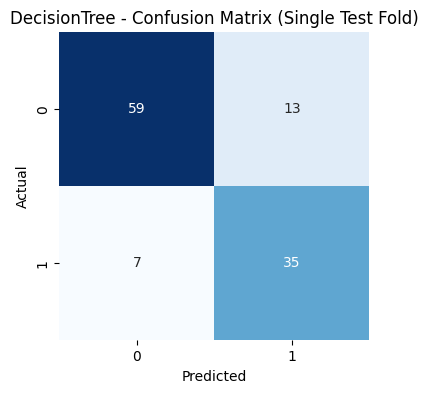

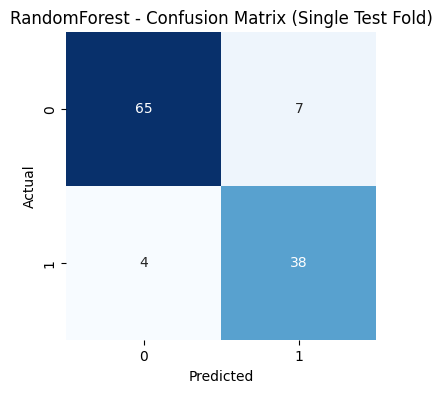

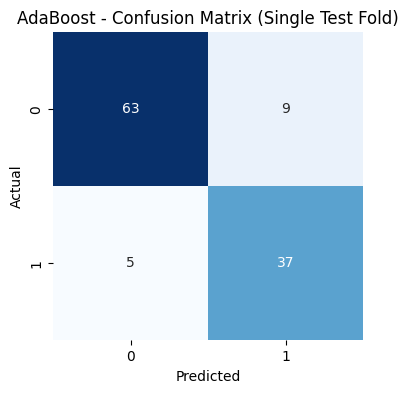

Paired t-test (Decision Tree vs. Random Forest):
  t-statistic = -6.6645, p-value = 0.0026

Paired t-test (Decision Tree vs. AdaBoost):
  t-statistic = -3.8420, p-value = 0.0184

Paired t-test (Random Forest vs. AdaBoost):
  t-statistic = 0.3924, p-value = 0.7148


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from scipy.stats import ttest_rel


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cols = [
    'ID','Diagnosis','Mean Radius','Mean Texture','Mean Perimeter','Mean Area','Mean Smoothness',
    'Mean Compactness','Mean Concavity','Mean Concave Points','Mean Symmetry','Mean Fractal Dimension',
    'Radius SE','Texture SE','Perimeter SE','Area SE','Smoothness SE','Compactness SE','Concavity SE',
    'Concave Points SE','Symmetry SE','Fractal Dimension SE','Worst Radius','Worst Texture',
    'Worst Perimeter','Worst Area','Worst Smoothness','Worst Compactness','Worst Concavity',
    'Worst Concave Points','Worst Symmetry','Worst Fractal Dimension'
]
data = pd.read_csv(url, header=None, names=cols)
data.drop(columns=['ID'], inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Example subset of features (adjust as desired)
selected_features = [
    'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
    'Concavity SE', 'Symmetry SE', 'Worst Smoothness'
]
X = data[selected_features].values
y = data['Diagnosis'].values

X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Example models from prior tasks
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)   # Decision Tree
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Bagging
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)      # Boosting

# Fit each model on the same training set, then generate confusion matrix on the same test set
models = {'DecisionTree': dt_model, 'RandomForest': rf_model, 'AdaBoost': ab_model}

for name, model in models.items():
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    
    # Display confusion matrix
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap="Blues")
    plt.title(f'{name} - Confusion Matrix (Single Test Fold)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracies per fold for each model
dt_scores = []
rf_scores = []
ab_scores = []

for train_index, test_index in skf.split(X, y):
    X_tr, X_te = X[train_index], X[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    
    # Decision Tree
    dt_model.fit(X_tr, y_tr)
    dt_pred = dt_model.predict(X_te)
    dt_scores.append(accuracy_score(y_te, dt_pred))
    
    # Random Forest
    rf_model.fit(X_tr, y_tr)
    rf_pred = rf_model.predict(X_te)
    rf_scores.append(accuracy_score(y_te, rf_pred))
    
    # AdaBoost
    ab_model.fit(X_tr, y_tr)
    ab_pred = ab_model.predict(X_te)
    ab_scores.append(accuracy_score(y_te, ab_pred))

# Example: compare Decision Tree vs. Random Forest
tstat_dt_rf, pvalue_dt_rf = ttest_rel(dt_scores, rf_scores)

# Compare Decision Tree vs. AdaBoost
tstat_dt_ab, pvalue_dt_ab = ttest_rel(dt_scores, ab_scores)

# Compare Random Forest vs. AdaBoost
tstat_rf_ab, pvalue_rf_ab = ttest_rel(rf_scores, ab_scores)

print("Paired t-test (Decision Tree vs. Random Forest):")
print(f"  t-statistic = {tstat_dt_rf:.4f}, p-value = {pvalue_dt_rf:.4f}")

print("\nPaired t-test (Decision Tree vs. AdaBoost):")
print(f"  t-statistic = {tstat_dt_ab:.4f}, p-value = {pvalue_dt_ab:.4f}")

print("\nPaired t-test (Random Forest vs. AdaBoost):")
print(f"  t-statistic = {tstat_rf_ab:.4f}, p-value = {pvalue_rf_ab:.4f}")

# **Discussion: Bias-Variance Trade-Off for Each Model**

In examining the three models—**Decision Tree**, **Random Forest**, and **AdaBoost**—we can infer several points about their respective **bias and variance** tendencies based on the **confusion matrices** and **statistical significance tests**.

---

## **1. Decision Tree**

- **Confusion Matrix**  
  - 00: 59 | 01: 13  
  - 10: 7  | 11: 35  
  - This matrix shows that the single Decision Tree tends to **misclassify** some benign tumors as malignant (13 such cases) and some malignant tumors as benign (7 cases).  

- **Bias**  
  - A single Decision Tree—especially if restricted by `max_depth`—often carries **moderate bias**. It may fail to capture all complex decision boundaries, resulting in moderate accuracy compared to ensembles.  

- **Variance**  
  - Although decision trees can have **high variance** when they are grown fully (unpruned), using a fixed `max_depth` can somewhat reduce variance (yet potentially increase bias). Still, a single tree is typically more sensitive to training-set fluctuations than a well-averaged ensemble.

- **Statistical Tests**  
  - The **t-tests** show significant differences when comparing the Decision Tree’s accuracy to both Random Forest (**p = 0.0026**) and AdaBoost (**p = 0.0184**). This implies that in multiple folds, the single Decision Tree underperforms these ensemble methods consistently.

**Conclusion**: The Decision Tree may suffer from higher variance if grown deep or higher bias if pruned/shallow. Overall, its simpler structure leads to statistically lower performance than ensembles in this setting.

---

## **2. Random Forest (Bagging)**

- **Confusion Matrix**  
  - 00: 65 | 01: 7  
  - 10: 4  | 11: 38  
  - Fewer misclassifications overall, indicating a balanced capture of benign and malignant classes.

- **Bias**  
  - Because Bagging (Random Forest) **averages** many trees, it reduces the overall bias somewhat more effectively than a single shallow tree, though each base tree might still be a standard classifier.  

- **Variance**  
  - Random Forest significantly **reduces variance** by training on **bootstrapped** subsets and aggregating predictions. This typically makes it more stable and robust to noise compared to a single tree.

- **Statistical Tests**  
  - **Decision Tree vs. Random Forest** is significant (**p = 0.0026**), confirming that the averaging effect leads to a **better and more consistent** performance than a lone Decision Tree.  
  - **Random Forest vs. AdaBoost** is **not** significant (**p = 0.7148**), suggesting they are statistically indistinguishable in this experiment, at least with default hyperparameters.

**Conclusion**: By averaging across multiple trees, Random Forest lowers variance without drastically increasing bias, thus achieving strong performance relative to a single Decision Tree.

---

## **3. AdaBoost (Boosting)**

- **Confusion Matrix**  
  - 00: 63 | 01: 9  
  - 10: 5  | 11: 37  
  - Similar to Random Forest, AdaBoost exhibits relatively strong performance with fewer overall misclassifications compared to the single Decision Tree.

- **Bias**  
  - Boosting aims to **sequentially reduce bias** by focusing on previously misclassified instances at each iteration. Over many iterations, AdaBoost can drive the training error down and lower the model’s bias.  

- **Variance**  
  - In some cases, Boosting can **increase** variance because it keeps adding new weak learners that strongly focus on harder cases. However, with appropriate regularization or a moderate number of estimators, AdaBoost can manage variance effectively.  

- **Statistical Tests**  
  - **Decision Tree vs. AdaBoost** yields **p = 0.0184**, indicating AdaBoost outperforms the single Tree.  
  - **Random Forest vs. AdaBoost** yields **p = 0.7148**, meaning no statistically significant difference under the conditions tested—implying they are similarly effective.

**Conclusion**: AdaBoost’s iterative updates tend to lower bias significantly. Its overall variance is managed by controlling the learning rate or number of estimators, often resulting in performance on par with Random Forest in this scenario.

---

## **Overall Trade-Off Summary**

1. **Decision Tree**:  
   - **Higher variance** when grown freely, or **higher bias** if heavily constrained.  
   - Statistical tests confirm it performs worse than the ensembles on average.

2. **Random Forest (Bagging)**:  
   - **Lower variance** thanks to averaging across bootstrapped samples.  
   - Maintains a moderate bias, but often outperforms a single tree.

3. **AdaBoost (Boosting)**:  
   - **Lowers bias** by iteratively focusing on hard-to-classify examples.  
   - Can have moderate variance, but in practice often performs similarly to Random Forest under default settings.

In this breast cancer classification task, **both ensembles** outperform a single Decision Tree in a statistically significant way, illustrating how combining multiple learners (Bagging or Boosting) effectively tackles the **bias-variance** trade-off. The difference between the **two ensemble methods** is **not** statistically significant, suggesting both can achieve robust and comparable performance on this dataset.
